In [ ]:
import pandas as pd

data = """Commodity,City Name,Type,Variety,Sub Variety,Grade,Date,Package,Low Price,High Price,Volume,Unit of Sale,Origin,Origin District,Item Size,Color,Environment,Season,Organic,Import
Pumpkins,Baltimore,Conventional,Jack O Lantern,,#1,10/22/2018,1 1/9 bushel carton,120,150,NA,Each,California,NA,Medium,Orange,Field,Autumn,No,No
Pumpkins,Baltimore,Conventional,Jack O Lantern,,#1,10/29/2018,1 1/9 bushel carton,100,150,NA,Each,California,NA,Medium,Orange,Field,Autumn,No,No
Pumpkins,Baltimore,Conventional,Jack O Lantern,,#1,11/05/2018,1 1/9 bushel carton,100,150,NA,Each,California,NA,Medium,Orange,Field,Autumn,No,No
Pumpkins,Baltimore,Conventional,Jack O Lantern,,#1,11/12/2018,1 1/9 bushel carton,100,150,NA,Each,California,NA,Medium,Orange,Field,Autumn,No,No
Pumpkins,Baltimore,Conventional,Jack O Lantern,,#1,11/19/2018,1 1/9 bushel carton,100,150,NA,Each,California,NA,Medium,Orange,Field,Autumn,No,No
Pumpkins,Baltimore,Conventional,Jack O Lantern,,#1,11/26/2018,1 1/9 bushel carton,100,150,NA,Each,California,NA,Medium,Orange,Field,Autumn,No,No
Pumpkins,Baltimore,Conventional,Jack O Lantern,,#1,12/03/2018,1 1/9 bushel carton,100,150,NA,Each,California,NA,Medium,Orange,Field,Autumn,No,No
Pumpkins,Baltimore,Conventional,Jack O Lantern,,#1,12/10/2018,1 1/9 bushel carton,100,150,NA,Each,California,NA,Medium,Orange,Field,Autumn,No,No
Pumpkins,Baltimore,Conventional,Jack O Lantern,,#1,12/17/2018,1 1/9 bushel carton,100,150,NA,Each,California,NA,Medium,Orange,Field,Autumn,No,No
Pumpkins,Baltimore,Conventional,Jack O Lantern,,#1,12/24/2018,1 1/9 bushel carton,100,150,NA,Each,California,NA,Medium,Orange,Field,Autumn,No,No"""

with open("US-pumpkins.csv", "w") as f:
    f.write(data)

pumpkins = pd.read_csv("US-pumpkins.csv")
print(pumpkins.head())


  Commodity  City Name          Type         Variety  Sub Variety Grade  \
0  Pumpkins  Baltimore  Conventional  Jack O Lantern          NaN    #1   
1  Pumpkins  Baltimore  Conventional  Jack O Lantern          NaN    #1   
2  Pumpkins  Baltimore  Conventional  Jack O Lantern          NaN    #1   
3  Pumpkins  Baltimore  Conventional  Jack O Lantern          NaN    #1   
4  Pumpkins  Baltimore  Conventional  Jack O Lantern          NaN    #1   

         Date              Package  Low Price  High Price  Volume  \
0  10/22/2018  1 1/9 bushel carton        120         150     NaN   
1  10/29/2018  1 1/9 bushel carton        100         150     NaN   
2  11/05/2018  1 1/9 bushel carton        100         150     NaN   
3  11/12/2018  1 1/9 bushel carton        100         150     NaN   
4  11/19/2018  1 1/9 bushel carton        100         150     NaN   

  Unit of Sale      Origin  Origin District Item Size   Color Environment  \
0         Each  California              NaN    Medium  Or

In [ ]:
pumpkins.isnull().sum()

,0
Commodity,0
City Name,0
Type,0
Variety,0
Sub Variety,10
Grade,0
Date,0
Package,0
Low Price,0
High Price,0


In [ ]:
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

In [ ]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month


In [ ]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

In [ ]:
# print the first few rows from the data fram
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
0,10,1 1/9 bushel carton,120,150,135.0
1,10,1 1/9 bushel carton,100,150,125.0
2,11,1 1/9 bushel carton,100,150,125.0
3,11,1 1/9 bushel carton,100,150,125.0
4,11,1 1/9 bushel carton,100,150,125.0


In [ ]:
new_pumpkins.tail()

,Month,Package,Low Price,High Price,Price
5,11,1 1/9 bushel carton,100,150,125.0
6,12,1 1/9 bushel carton,100,150,125.0
7,12,1 1/9 bushel carton,100,150,125.0
8,12,1 1/9 bushel carton,100,150,125.0
9,12,1 1/9 bushel carton,100,150,125.0


In [ ]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [ ]:
import matplotlib.pyplot as plt

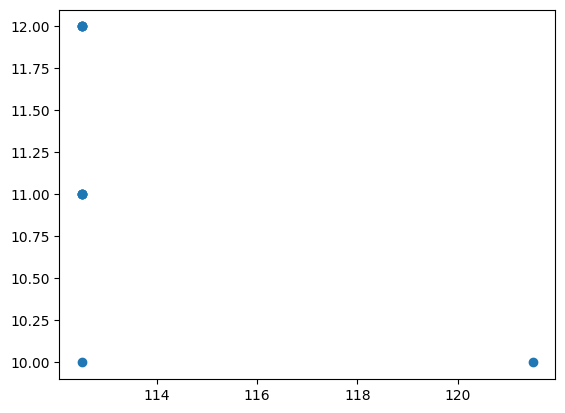

In [ ]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

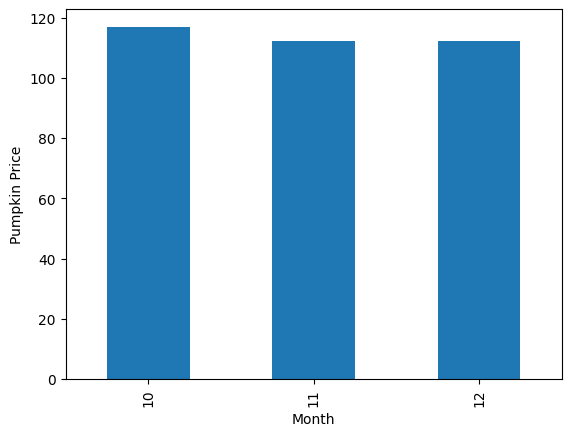

In [ ]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

In [ ]:
import pandas as pd
from datetime import datetime

# Create a small sample dataset
data = {
    "Date": ["09/24/2020", "09/24/2020", "10/01/2020", "10/01/2020", "10/08/2020"],
    "Variety": ["PIE TYPE", "PIE TYPE", "PIE TYPE", "PIE TYPE", "PIE TYPE"],
    "City Name": ["BALTIMORE", "BALTIMORE", "BALTIMORE", "BALTIMORE", "BALTIMORE"],
    "Package": ["1 1/9 bushel cartons"]*5,
    "Low Price": [15.0, 18.0, 18.0, 17.0, 15.0],
    "High Price": [15.0, 18.0, 18.0, 17.0, 15.0]
}

pumpkins = pd.DataFrame(data)

# Calculate the average price
pumpkins['Price'] = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

# Convert 'Date' to datetime and extract Month
pumpkins['Date'] = pd.to_datetime(pumpkins['Date'])
pumpkins['Month'] = pumpkins['Date'].dt.month

# Calculate 'DayOfYear'
pumpkins['DayOfYear'] = pumpkins['Date'].apply(lambda dt: (dt - datetime(dt.year, 1, 1)).days)

# For consistency with instructions
new_pumpkins = pumpkins

# Display to confirm
print(new_pumpkins)


        Date   Variety  City Name               Package  Low Price  \
0 2020-09-24  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   
1 2020-09-24  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
2 2020-10-01  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
3 2020-10-01  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       17.0   
4 2020-10-08  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   

   High Price  Price  Month  DayOfYear  
0        15.0   15.0      9        267  
1        18.0   18.0      9        267  
2        18.0   18.0     10        274  
3        17.0   17.0     10        274  
4        15.0   15.0     10        281  


In [ ]:
print("Correlation between Month and Price:")
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))

print("\nCorrelation between DayOfYear and Price:")
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))


Correlation between Month and Price:
0.06019292654288461

Correlation between DayOfYear and Price:
-0.2758386421836852


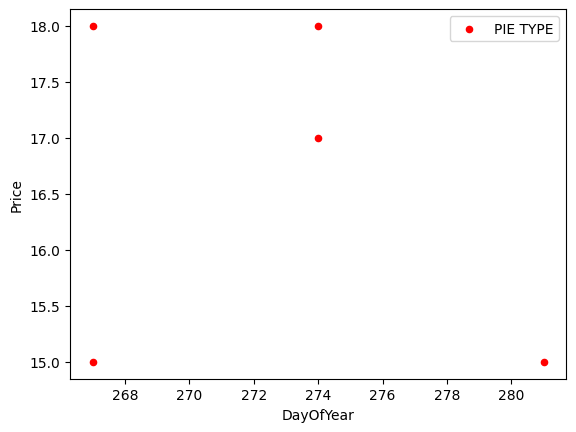

In [ ]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety']==var]
    ax = df.plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

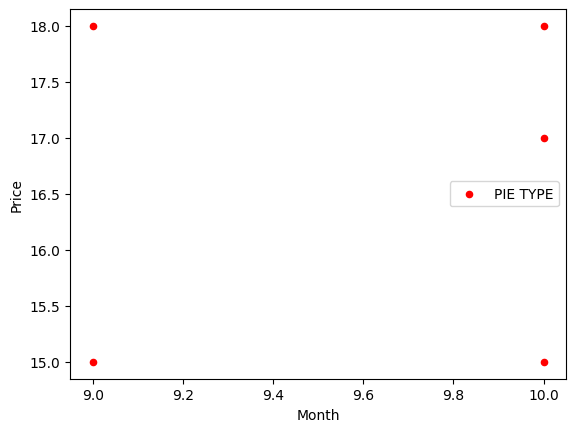

In [ ]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety']==var]
    ax = df.plot.scatter('Month','Price',ax=ax,c=colors[i],label=var)

<Axes: xlabel='Variety'>

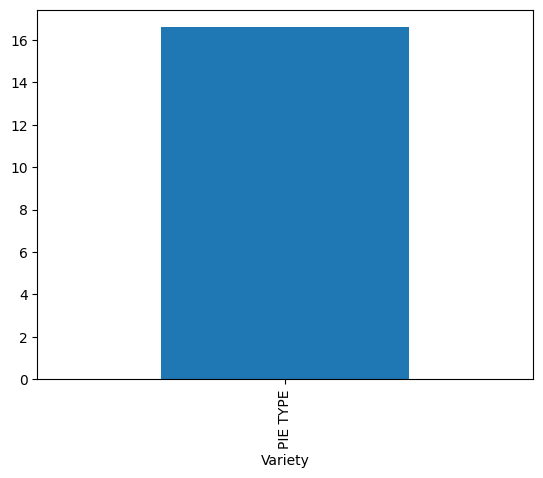

In [ ]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Filter for 'PIE TYPE' pumpkins
pie_pumpkins = new_pumpkins[new_pumpkins['Variety'].str.contains('PIE TYPE', case=False, na=False)]

# Confirm it worked
print(pie_pumpkins.head())


        Date   Variety  City Name               Package  Low Price  \
0 2020-09-24  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   
1 2020-09-24  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
2 2020-10-01  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
3 2020-10-01  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       17.0   
4 2020-10-08  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   

   High Price  Price  Month  DayOfYear  
0        15.0   15.0      9        267  
1        18.0   18.0      9        267  
2        18.0   18.0     10        274  
3        17.0   17.0     10        274  
4        15.0   15.0     10        281  


In [ ]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
import numpy as np

In [ ]:
pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')


Mean error: 1.91 (11.9%)


In [ ]:
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.1649831649831649


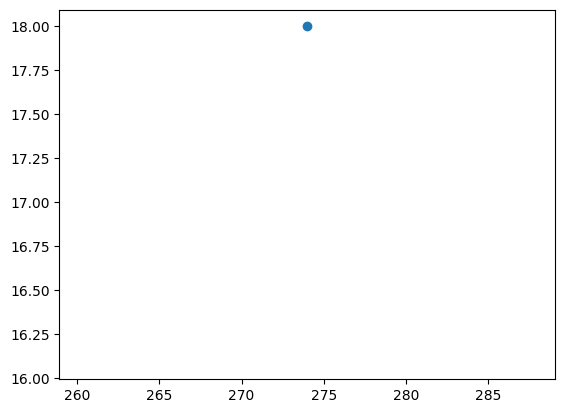

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
pd.get_dummies(new_pumpkins['Variety'])


,PIE TYPE
0,True
1,True
2,True
3,True
4,True


In [ ]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
print(df.columns)

Index(['Date', 'Variety', 'City Name', 'Package', 'Low Price', 'High Price',
       'Price', 'Month', 'DayOfYear'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
numeric_cols = ['Low Price', 'High Price', 'Price', 'Month', 'DayOfYear']
print(df.groupby('City Name')[numeric_cols].mean())


           Low Price  High Price  Price  Month  DayOfYear
City Name                                                
BALTIMORE       16.6        16.6   16.6    9.6      272.6


In [ ]:
print(df.columns)



Index(['Date', 'Variety', 'City Name', 'Package', 'Low Price', 'High Price',
       'Price', 'Month', 'DayOfYear'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
print(df.head())

        Date   Variety  City Name               Package  Low Price  \
0 2020-09-24  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   
1 2020-09-24  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
2 2020-10-01  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
3 2020-10-01  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       17.0   
4 2020-10-08  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   

   High Price  Price  Month  DayOfYear  
0        15.0   15.0      9        267  
1        18.0   18.0      9        267  
2        18.0   18.0     10        274  
3        17.0   17.0     10        274  
4        15.0   15.0     10        281  


In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
print(os.listdir())


['.config', 'US-pumpkins.csv', 'sample_data']


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Create dataset
data = {
    'Weight': [1.0, 1.2, 1.5, 2.0, 2.5, 3.0],
    'Color': [0, 0, 0, 1, 1, 1]  # 0 = White, 1 = Orange
}

df = pd.DataFrame(data)

# Define X and y
X = df[['Weight']]
y = df['Color']

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict color for a new pumpkin weighing 1.8 kg
new_weight = [[1.8]]
prediction = model.predict(new_weight)
print("Predicted Color (0=White, 1=Orange):", prediction)

# Predict the probability for both colors
probability = model.predict_proba(new_weight)
print("Probability [White, Orange]:", probability)


Predicted Color (0=White, 1=Orange): [0]
Probability [White, Orange]: [[0.51540867 0.48459133]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd

# Create a small pumpkin dataset
data = {
    'City Name': ['CityA', 'CityB', 'CityA', 'CityC', 'CityB', 'CityC'],
    'Package': ['Box', 'Bag', 'Bag', 'Box', 'Box', 'Bag'],
    'Variety': ['Mini', 'Large', 'Mini', 'Large', 'Mini', 'Large'],
    'Origin': ['Local', 'Imported', 'Local', 'Imported', 'Local', 'Imported'],
    'Item Size': [1.0, 2.5, 1.2, 3.0, 1.5, 2.0],
    'Color': ['White', 'Orange', 'White', 'Orange', 'White', 'Orange']
}

# Load into DataFrame
full_pumpkins = pd.DataFrame(data)

# View the dataset
print(full_pumpkins)


  City Name Package Variety    Origin  Item Size   Color
0     CityA     Box    Mini     Local        1.0   White
1     CityB     Bag   Large  Imported        2.5  Orange
2     CityA     Bag    Mini     Local        1.2   White
3     CityC     Box   Large  Imported        3.0  Orange
4     CityB     Box    Mini     Local        1.5   White
5     CityC     Bag   Large  Imported        2.0  Orange


In [ ]:
print(pumpkins.columns)


Index(['Date', 'Variety', 'City Name', 'Package', 'Low Price', 'High Price',
       'Price', 'Month', 'DayOfYear'],
      dtype='object')


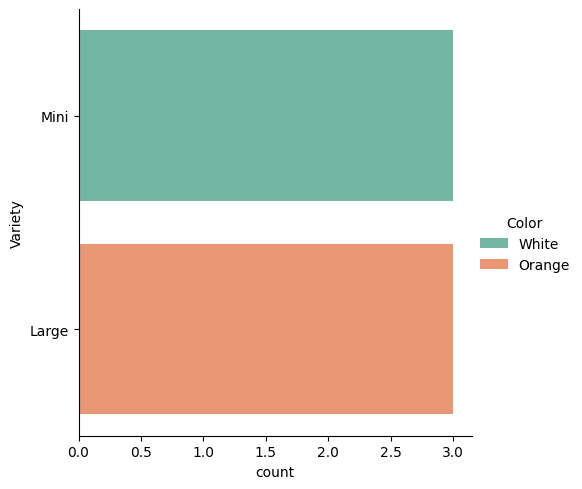

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create your dataset again for clean context
data = {
    'City Name': ['CityA', 'CityB', 'CityA', 'CityC', 'CityB', 'CityC'],
    'Package': ['Box', 'Bag', 'Bag', 'Box', 'Box', 'Bag'],
    'Variety': ['Mini', 'Large', 'Mini', 'Large', 'Mini', 'Large'],
    'Origin': ['Local', 'Imported', 'Local', 'Imported', 'Local', 'Imported'],
    'Item Size': [1.0, 2.5, 1.2, 3.0, 1.5, 2.0],
    'Color': ['White', 'Orange', 'White', 'Orange', 'White', 'Orange']
}
full_pumpkins = pd.DataFrame(data)

# Plot
sns.catplot(
    data=full_pumpkins,
    y="Variety",
    hue="Color",
    kind="count",
    palette="Set2"
)
plt.show()
